cz1 pętla histerezy


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

In [29]:
raw_data = pd.read_excel('lab39.xlsx')
N = 10
r1 = 2
l = 13.8e-3
c = 1e-6
r2 = 300
s = 6.4e-6
H1 = N*raw_data.loc[:,'H1']*10**-3/(l*r1)
B1 = r2*c*raw_data.loc[:,'B1']*10**-3/(N*s)
H =  N*raw_data.loc[:,'H']*10**-3/(l*r1)
Bm = r2*c*raw_data.loc[:,'Bm']*10**-3/(N*s)
print(raw_data)


        B1      H1      Bm        H  Un  mv wszystko  Unnamed: 6     B     T
0  -50.000 -260.00   0.000    0.000   0          NaN         NaN  35.1  30.0
1  -28.500  -75.00   2.350   10.000   1          NaN         NaN  32.9  40.0
2    0.000  -50.00   4.500   16.250   2          NaN         NaN  31.6  45.0
3   33.500    0.00   5.700   18.750   3          NaN         NaN  29.9  50.0
4   42.050   60.00   7.600   23.750   5          NaN         NaN  27.9  55.0
5   51.300  240.00  11.000   28.700   7          NaN         NaN  26.0  60.0
6   30.400   78.75  12.800   30.000   8          NaN         NaN  23.3  65.0
7    3.575   57.50  13.700   32.500   9          NaN         NaN  18.9  70.0
8   -3.800   45.00  15.500   33.700  10          NaN         NaN  16.3  72.0
9  -26.825   17.50  17.100   35.000  11          NaN         NaN  11.0  73.8
10 -49.400 -260.00  18.500   36.800  12          NaN         NaN  10.4  74.0
11     NaN     NaN  19.700   38.700  13          NaN         NaN   9.0  74.4

Pętla hsiterezy

0    -94.202899
1    -27.173913
2    -18.115942
3      0.000000
4     21.739130
5     86.956522
6     28.532609
7     20.833333
8     16.304348
9      6.340580
10   -94.202899
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
Name: H1, dtype: float64


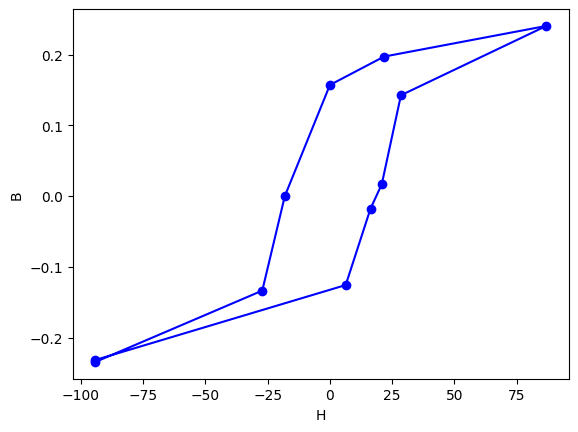

In [30]:
plt.plot(H1,B1,marker='o',c = 'b')
print(H1)
plt.xlabel('H')
plt.ylabel('B')
plt.show()

Krzywa pierwotnego namagnesowania

0     0.00
1     0.01
2     0.02
3     0.03
4     0.04
5     0.05
6     0.06
7     0.06
8     0.07
9     0.08
10    0.09
11    0.09
12    0.10
13    0.11
14    0.11
15    0.12
16    0.13
17    0.13
18    0.14
19    0.15
20    0.15
21    0.16
22    0.17
23    0.17
24    0.18
25    0.18
26    0.19
27    0.20
28    0.20
29    0.21
30    0.22
31    0.22
32    0.23
33    0.24
Name: Bm, dtype: float64


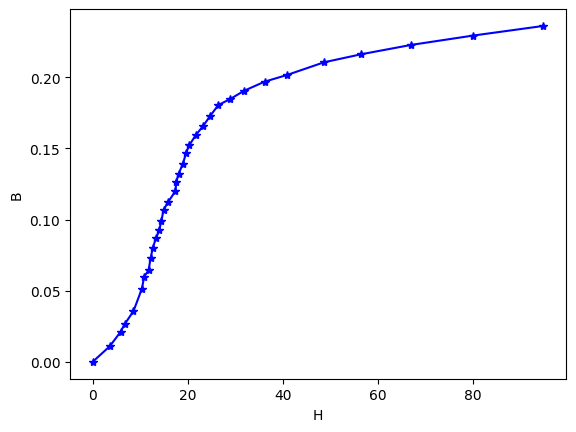

In [36]:
plt.plot(H,Bm,marker = '*',c = 'b')

print(Bm.round(2))
plt.xlabel('H')
plt.ylabel('B')
plt.show()

Temperatura curie


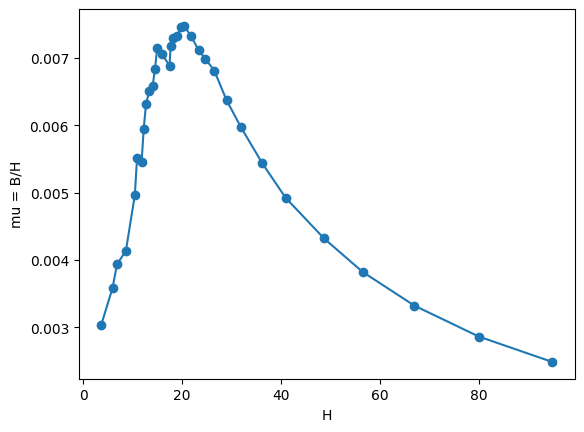

In [32]:
plt.plot(H,Bm/H, marker = 'o')
plt.xlabel('H')
plt.ylabel('mu = B/H')
plt.show()

0.7717231924315737
[77.75 77.75]


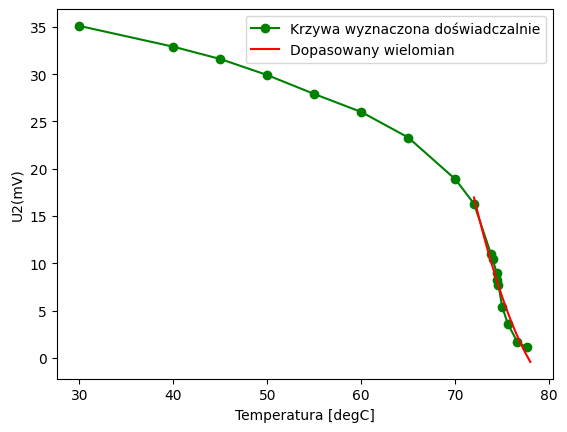

In [33]:
import numpy.polynomial.chebyshev as npcheb
import math

plt.plot(raw_data.loc[:,'T'],raw_data.loc[:,'B'],marker = 'o',c = 'g',label = 'Krzywa wyznaczona doświadczalnie')
prediction_data:pd.DataFrame = raw_data.loc[8:17,('B','T')]
T = np.linspace(72,78,10000)
model = npcheb.chebfit(prediction_data.loc[-14:,'T'],prediction_data.loc[-14:,'B'],2)
B = npcheb.chebval(T,model)
for_rmse = npcheb.chebval(prediction_data.loc[-14:,'T'],model)
squares = (np.array(prediction_data.loc[-14:,'B']) - np.array(for_rmse))**2
rmse = math.sqrt(squares.sum()/len(squares))
print(rmse)
print(T[abs(B) < 1e-3]) 
plt.plot(T,B,c = 'r',label = 'Dopasowany wielomian')
plt.xlabel('Temperatura [degC]')
plt.ylabel('U2(mV)')
plt.legend()
plt.show()